In [1]:
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

for this code , i have used blob detector to find inputs, as you can see it is not appropiate as it misses some point and then as coordinates of image in open cv is a mirrorr image in y axis , i have make changes in y and made to look like image and finaly with sklearn , i have drawn lineatr and ransac


In [2]:
img1=cv2.imread('line_ransac.png',0)

In [3]:
detector = cv2.SimpleBlobDetector_create()

In [4]:
keypoints = detector.detect(img1)  

In [5]:
im_with_keypoints = cv2.drawKeypoints(img1, keypoints, np.array([]), (0, 255, 255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  

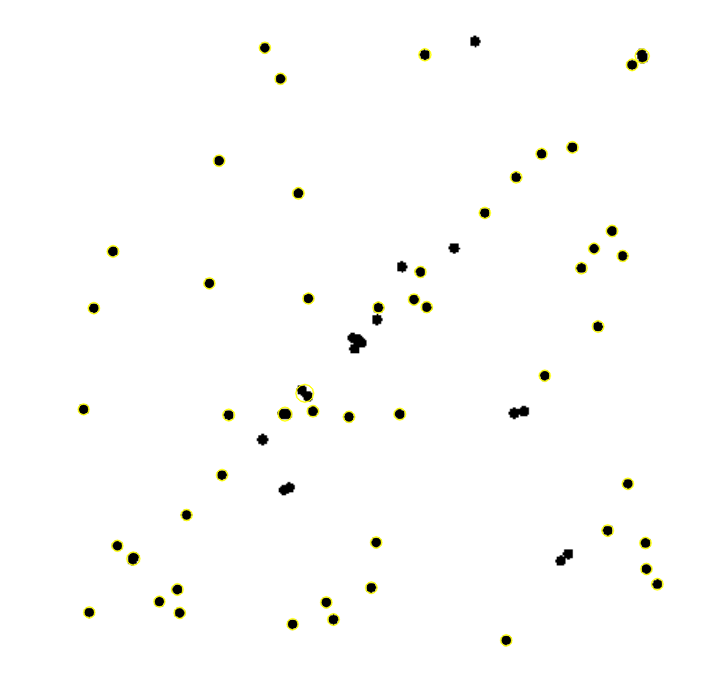

In [6]:
cv2_imshow(im_with_keypoints)

In [7]:
keypoints = np.float32([kp.pt for kp in keypoints])

In [8]:
print(keypoints)


[[505.75912  639.8511  ]
 [292.1037   623.7425  ]
 [179.18506  612.43494 ]
 [ 88.75856  611.9341  ]
 [325.8154   601.9087  ]
 [158.89445  601.15247 ]
 [176.89906  589.01575 ]
 [370.78983  587.2581  ]
 [645.9296   568.5249  ]
 [132.81079  558.099   ]
 [116.89053  545.32837 ]
 [644.98444  542.51636 ]
 [375.66455  541.9839  ]
 [607.211    530.1006  ]
 [186.07071  514.4753  ]
 [627.37476  483.2881  ]
 [221.57816  474.60468 ]
 [348.49338  416.36932 ]
 [228.16193  414.56342 ]
 [399.27927  413.59827 ]
 [284.43182  413.60278 ]
 [ 83.1255   408.8846  ]
 [544.2563   375.27145 ]
 [ 93.2886   307.67365 ]
 [426.25275  306.65506 ]
 [413.4952   299.03543 ]
 [307.9099   297.977   ]
 [208.88034  282.90277 ]
 [419.92157  271.47333 ]
 [580.884    267.60687 ]
 [622.20306  255.41934 ]
 [112.490364 250.90794 ]
 [593.5602   248.11324 ]
 [611.52466  230.52673 ]
 [484.31943  212.4575  ]
 [297.89392  192.81267 ]
 [515.6605   176.75177 ]
 [218.6139   160.26964 ]
 [541.038    153.36931 ]
 [571.8557   146.89787 ]


In [9]:
x = keypoints[:,0]
y = keypoints[:,1]

In [10]:
y.max()

639.8511

In [11]:
y.min()

47.311825

In [12]:
y=y-y.max()-y.min()

In [13]:
y=y*-1

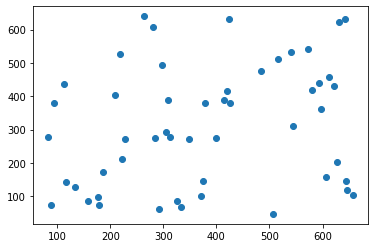

In [14]:
plt.scatter(x,y)

In [15]:
from sklearn import linear_model

In [16]:

x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [21]:
ransac = linear_model.RANSACRegressor(max_trials=1000,min_samples=45)
ransac.fit(x, y)



RANSACRegressor(max_trials=1000, min_samples=45)

In [22]:
lr = linear_model.LinearRegression()
lr.fit(x, y)

LinearRegression()

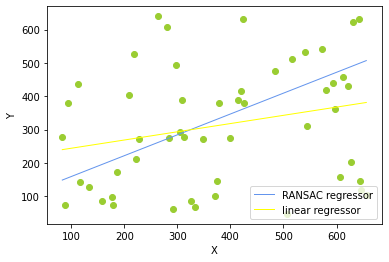

In [23]:
line_X = np.arange(x.min(), x.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

plt.scatter(x,y, color='yellowgreen')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=1,
         label='RANSAC regressor')
plt.plot(line_X, line_y, color='yellow', linewidth=1,
         label='linear regressor')
plt.legend(loc='lower right')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

as you can say linear regressor fail and is not optimal for image point detection,as it consider (yline-yactual)^2 and not even distance
Ransac model fit completely as it has job to select best points and ignore outliers , ransac line fits completely andignores outlier .
i have consider 1000 trial but , if we decrease the number of trial to certain , it will be then fail misreably but if we increase till we have no computational error , it will be a sucesss

inliers= area upto certain certain region below and above (perpependicular)distance 

and all the points not in region will be outliers and wont be of any use in homography.

